# Лекция 01 [habr](https://habrahabr.ru/company/ods/blog/322626/)
pandas, groupby, простые статистики

# Лекция 02 [habr](https://habrahabr.ru/company/ods/blog/322626/)
визуализация данных

In [40]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/video_games_sales.csv').dropna()
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')
print(df.shape)

(6825, 16)


* Matplotlib: вызываем .plot() у dataframe, kind="..", много настроек

## Seaborn
более высокоуровневое API на базе matplotlib

**pairplot** -- пачка графиков с гистограммами на диагонали и парными графиками в прочих местах

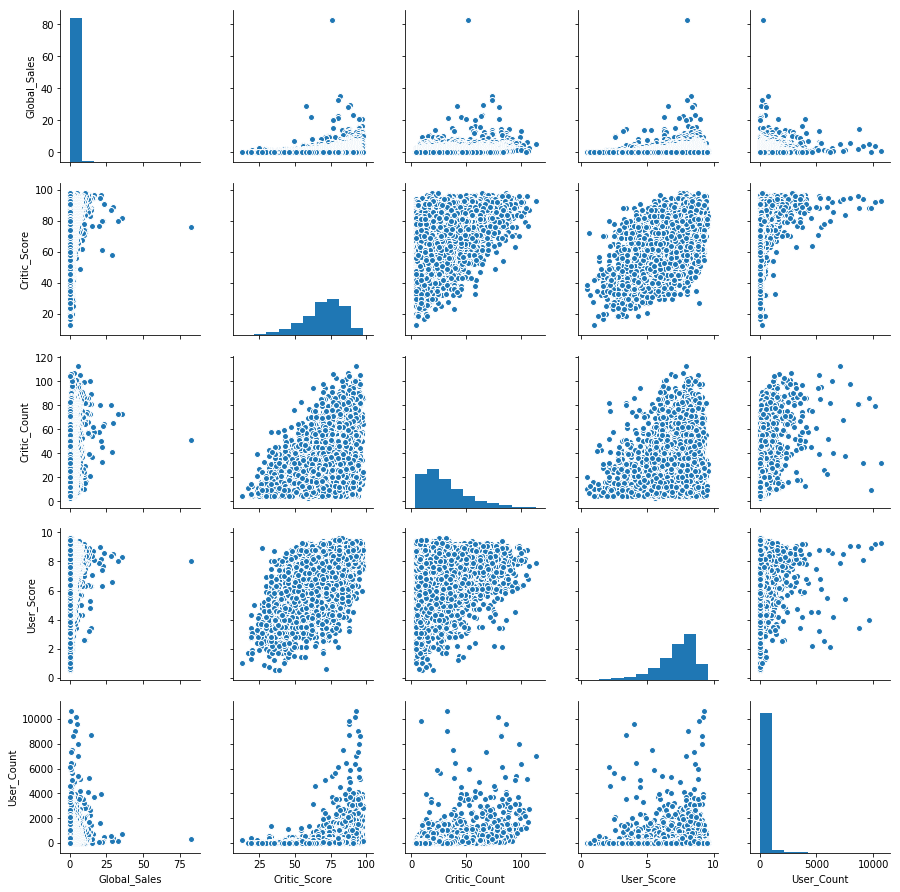

In [13]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

sns.pairplot(df[cols])

**distplot** -- гистограмма с [приближенной](https://en.wikipedia.org/wiki/Kernel_density_estimation) плотностью

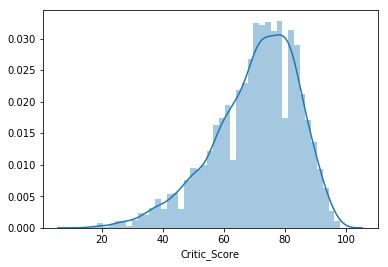

In [14]:
sns.distplot(df.Critic_Score)

**jointplot** -- парный график + гистограммы

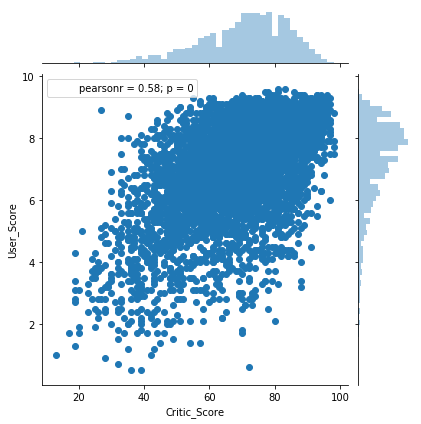

In [15]:
sns.jointplot(df.Critic_Score, df.User_Score)

**boxplot** -- ящик с усами
* коробка -- интерквартильный размах
* усы -- минимум и максимум в интервале $(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)$, где $IQR = Q3 - Q1$ — интерквартильный размах

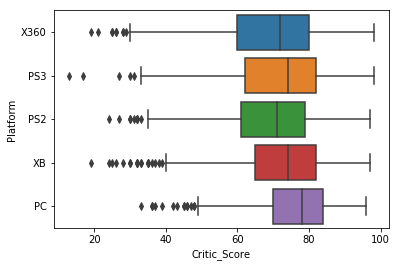

In [16]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h")

3.25 7.75 3.25 7.75


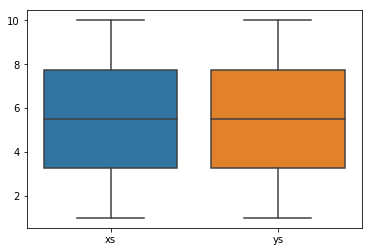

In [32]:
xs = pd.Series([1,2,3,4,5,6,7,8,9,10], name='xs')
ys = pd.Series([1,1,3,4,5,6,7,8,10,10], name='ys')
xs_q1, xs_q2 = xs.quantile([0.25, 0.75])
ys_q1, ys_q2 = ys.quantile([0.25, 0.75])
print(xs_q1, xs_q2, ys_q1, ys_q2)

sns.boxplot(data=pd.concat([xs, ys], axis=1))

**heatmap**

с числами! магия!

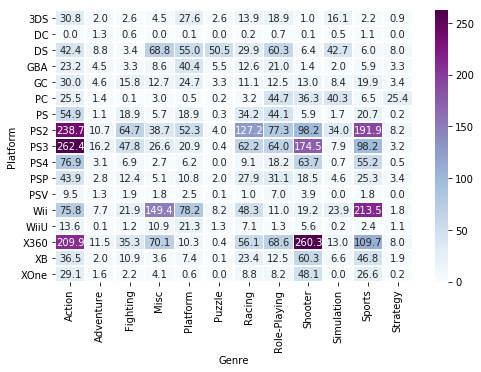

In [38]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5, cmap='BuPu')

In [39]:
platform_genre_sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,30.81,2.00,2.63,4.48,27.61,2.63,13.89,18.94,1.02,16.08,2.20,0.94
DC,0.00,1.33,0.56,0.00,0.12,0.00,0.20,0.68,0.05,0.52,1.09,0.00
DS,42.43,8.83,3.37,68.82,55.02,50.50,29.93,60.31,6.40,42.71,6.01,8.00
GBA,23.21,4.54,3.28,8.59,40.36,5.47,12.60,21.00,1.40,2.03,5.93,3.34
GC,29.99,4.56,15.81,12.72,24.67,3.31,11.09,12.48,13.04,8.39,19.91,3.45
PC,25.45,1.42,0.13,3.02,0.46,0.19,3.18,44.68,36.34,40.34,6.54,25.37
PS,54.93,1.10,18.91,5.66,18.92,0.26,34.17,44.07,5.86,1.67,20.75,0.25
PS2,238.73,10.74,64.72,38.70,52.34,3.97,127.17,77.30,98.20,34.01,191.88,8.21
PS3,262.38,16.18,47.83,26.59,20.91,0.40,62.17,64.00,174.54,7.91,98.20,3.19


## Plotly
интерактивные графики

In [42]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Для начала построим **line plot** с динамикой числа вышедших игр и их продаж по годам.

In [44]:
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

# сохранение в виде файла
# plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

**bar chart**

In [45]:
# считаем число проданных и вышедших игр по платформам
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

**box plot**

In [46]:
# создаем Box trace для каждого жанра из наших данных
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )

# визуализируем данные
iplot(data, show_link = False)

# Анализ данных про отток клиентов

In [48]:
df = pd.read_csv('data/telecom_churn.csv')

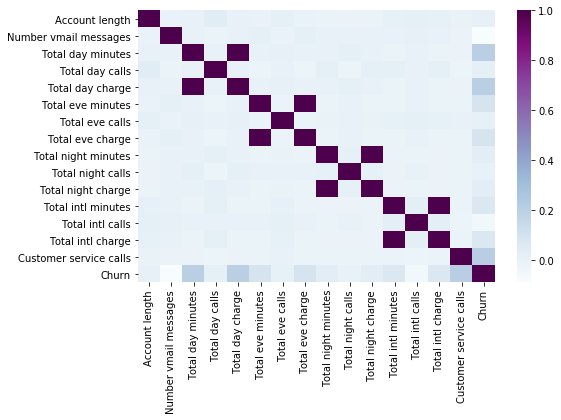

In [50]:
corr_matrix = df.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr()
sns.heatmap(corr_matrix, cmap='BuPu')

**t-SNE представление данных**

t-distributed Stohastic Neighbor Embedding: найдем такое отображение из многомерного признакового пространства на плоскость (или в 3D), чтоб точки, которые были далеко друг от друга, на плоскости тоже оказались удаленными, а близкие точки – также отобразились на близкие. То есть neighbor embedding – это своего рода поиск нового представления данных, при котором сохраняется соседство.

In [52]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# преобразуем все признаки в числовые, выкинув штаты
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = pd.factorize(X['International plan'])[0]
X['Voice mail plan'] = pd.factorize(X['Voice mail plan'])[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 1min 7s, sys: 2.42 s, total: 1min 10s
Wall time: 1min 10s


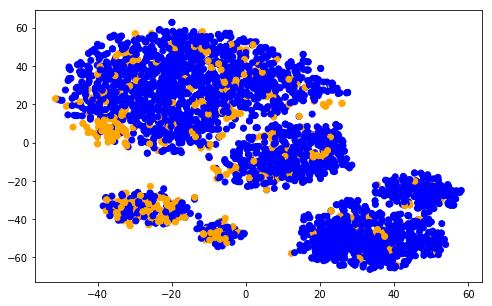

In [59]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Churn'].map({False: 'blue', True: 'orange'}))

Text(0.5,1,'Voice mail plan')

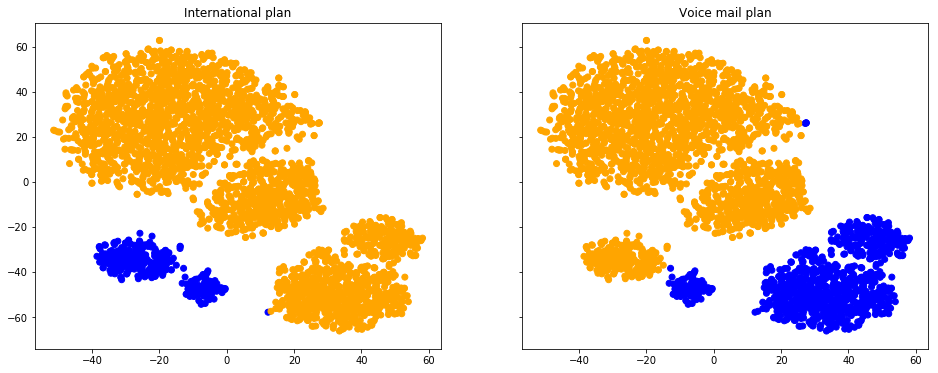

In [60]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['International plan'].map({'Yes': 'blue', 'No': 'orange'}))
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['Voice mail plan'].map({'Yes': 'blue', 'No': 'orange'}))
axes[0].set_title('International plan')
axes[1].set_title('Voice mail plan')